# **Personal Finance** - Analyze Financial Habits

# Sobre el conjunto de datos

El dataset contiene 32.424 registros individuales (filas), donde cada fila representa el perfil financiero de una persona. Los datos incluyen información demográfica, económica, crediticia y temporal, con el objetivo de reflejar la diversidad de comportamientos financieros a nivel global.

* **user_id**: Identificador único que representa a cada individuo.
* **age**: Edad del individuo, expresada en años (rango de 18 a 70).
* **gender**: Género del individuo: Masculino, Femenino u Otro.
* **education_level**: Nivel educativo más alto alcanzado (por ejemplo, Secundaria, Grado, Máster o Doctorado).
* **employment_status**: Situación laboral actual del individuo (por ejemplo, Empleado, Desempleado, Estudiante, Jubilado).
* **job_title**: Puesto de trabajo o cargo desempeñado.
* **monthly_income_usd**: Ingreso mensual aproximado en dólares estadounidenses.
* **monthly_expenses_usd**: Gastos mensuales aproximados en dólares estadounidenses.
* **savings_usd**: Total de ahorros acumulados por el individuo.
* **has_loan**: Indica si el individuo tiene un préstamo activo: Sí o No.
* **loan_type**: Tipo de préstamo asociado, en caso de tenerlo (por ejemplo, personal, hipotecario, automotriz o educativo).
* **loan_amount_usd**: Monto total del préstamo en dólares estadounidenses.
* **loan_term_months**: Duración del préstamo expresada en meses.
* **monthly_emi_usd**: Cuota mensual del préstamo (EMI, Equated Monthly Installment).
* **loan_interest_rate_pct**: Tasa de interés anual aplicada al préstamo, expresada en porcentaje.
* **debt_to_income_ratio**: Relación entre los pagos de deuda y los ingresos del individuo (DTI).
* **credit_score**: Puntuación crediticia sintética en una escala de 300 a 850.
* **savings_to_income_ratio**: Relación entre los ahorros y los ingresos anuales del individuo.
* **region**: Región geográfica en la que reside el individuo.
* **record_date**: Fecha de registro de la información financiera.

# 1.-Librerías

In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd #manejo de estructura de datos tabulares

# importamos configuracion de pandas
# -----------------------------------------------------------------------
pd.options.display.max_columns = None

# 2.-Cargar datos

In [2]:
# Cargamos los datos desde la carpeta data/raw
df = pd.read_csv("../data/raw/synthetic_personal_finance_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

Con esto ya tenemos un resumen del DataFrame: tiene 32424 filas y 20 columnas. Vemos el nombre de las columnas y también el Dtype float64 (8), int64 (3) y object (9). Las columnas contienen varias columnas object que seguramente podremos tratar más adelante, por ejemplo, conviertiéndolas en boleanas.

# 3.-Exploración inicial de los datos

Necesitamos saber cuántos valores no nulos tenemos para luego analizar los datos y detectar posibles líos, como valores que faltan o que no cuadran. Eso sí, si en lugar de fijarnos en los no nulos miramos directamente los nulos, el concepto resulta más sencillo de entender.

In [13]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [14]:
df.describe()

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000


#### Resultados primera exploración:

* **Demografía (age)**: Rango razonable, distribución amplia y centrada en edad laboral.

* **Ingresos, gastos y ahorros (monthly_income_usd, monthly_expenses_usd, savings_usd, savings_to_income_ratio)**: Los ahorros medios (~244k) son coherentes con savings_to_income_ratio ≈ 5× ingreso anual:
4.028 × 12 ≈ 48k; 48k × 5 ≈ 240k → consistencia interna entre columnas.

* **Préstamos (loan_amount_usd, loan_term_months, monthly_emi_usd, loan_interest_rate_pct, debt_to_income_ratio)**:
    * Muchos ceros en variables de préstamo → ceros estructurales de quienes no tienen préstamo.
Esto explica p25=0 y mediana=0 en debt_to_income_ratio, loan_term_months, monthly_emi_usd, etc.

    * debt_to_income_ratio parece estar en proporción (0–1) para la mayoría, pero el máximo 90.67 apunta a que la columna podría mezclar proporción y porcentaje en algunos casos o que el “DTI” está definido como % y para los sin préstamo es 0.

    **Acción**: verificar unidad y normalizar a un único escala (p.ej., 0–1).

    * monthly_emi_usd medio (~3.1k) es alto respecto al ingreso medio (~4k), pero recuerda que la media está “empujada” por ceros y por cuotas de quienes sí tienen préstamo.

    **Acción**: recalcular descriptivos condicionando a has_loan == "Yes" para una lectura realista.

* **credit_score**: Rango creíble 300–850; distribución amplia. Útil para comparar con DTI, ingresos, tipo de préstamo, etc.

**Conclusión**: Los datos tienen sentido.

## 3.1.-Nulos y tipos de datos

Vamos a ver los nulos que hay por cada columna y la información necesaria para entender por qué pueden haber nulos.

In [8]:
# creamos un dataframe con las columnas que necesitamos
df_resume = pd.DataFrame(columns=["count", "null", "null_%", "dtype", "unique"])

dict_resume = {}
for i in df.columns:
    dict_resume["count"] = df[i].count()
    dict_resume["null"] = df[i].isnull().sum()
    dict_resume["null_%"] = round(df[i].isnull().sum()/len(df),5)
    dict_resume["dtype"] = df[i].dtype
    dict_resume["unique"] = df[i].nunique()
    df_aux = pd.DataFrame(dict_resume, index=[i])
    df_resume = pd.concat([df_resume, df_aux], axis=0)

df_resume

,count,null,null_%,dtype,unique
user_id,32424,0,0.00000,object,32424
age,32424,0,0.00000,int64,52
gender,32424,0,0.00000,object,3
education_level,32424,0,0.00000,object,5
employment_status,32424,0,0.00000,object,4
job_title,32424,0,0.00000,object,9
monthly_income_usd,32424,0,0.00000,float64,30449
monthly_expenses_usd,32424,0,0.00000,float64,31319
savings_usd,32424,0,0.00000,float64,32415
has_loan,32424,0,0.00000,object,2


In [10]:
# lo pasamos a funcion
def data_resume(df):
    """
    Devuelve un resumen de los datos del dataframe con el recuento de valores, valores nulos, porcentaje de valores nulos, tipo de dato y número de valores únicos por columna. 

    Args:
        df (pd.DataFrame): dataframe a resumir.

    Returns:
        pd.DataFrame: resumen de los datos del dataframe.
    """
    df_resume = pd.DataFrame(columns=["count", "null", "null_%", "dtype", "unique"])
    dict_resume = {}
    for i in df.columns:
        dict_resume["count"] = df[i].count()
        dict_resume["null"] = df[i].isnull().sum()
        dict_resume["null_%"] = round(df[i].isnull().sum()/len(df),5)
        dict_resume["dtype"] = df[i].dtype
        dict_resume["unique"] = df[i].nunique()
        df_aux = pd.DataFrame(dict_resume, index=[i])
        df_resume = pd.concat([df_resume, df_aux], axis=0)
    return df_resume.sort_values(by="null_%", ascending=False)

In [11]:
data_resume(df)

,count,null,null_%,dtype,unique
loan_type,12995,19429,0.59922,object,4
age,32424,0,0.00000,int64,52
region,32424,0,0.00000,object,5
savings_to_income_ratio,32424,0,0.00000,float64,991
credit_score,32424,0,0.00000,int64,551
debt_to_income_ratio,32424,0,0.00000,float64,1541
loan_interest_rate_pct,32424,0,0.00000,float64,2684
monthly_emi_usd,32424,0,0.00000,float64,12948
loan_term_months,32424,0,0.00000,int64,10
loan_amount_usd,32424,0,0.00000,float64,12993


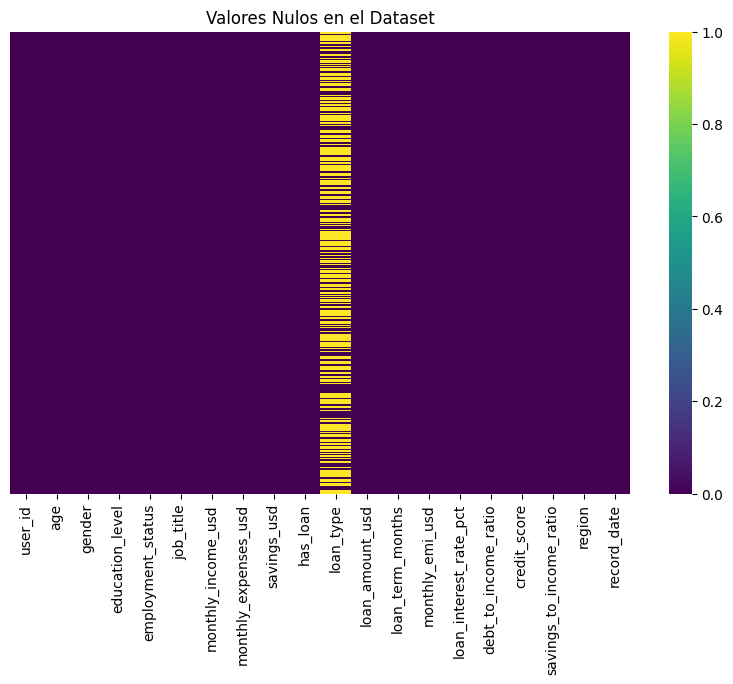

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, 
            cmap='viridis', annot=False)
plt.title('Valores Nulos en el Dataset')
plt.show()

Hemos visto que casi un 60% de las filas de la columna "loan_type" son nulos.

In [24]:
# Vamos a ver los valores categóricos de la columna "loan_type".
df["loan_type"].unique()

array([nan, 'Education', 'Business', 'Car', 'Home'], dtype=object)

In [21]:
# Vamos a comparar la cantidad de nulos de la columna "loan_type" con la cantidad de No de la columna "has_loan"

# Contar cuántos "No" hay en la columna has_loan
no_loans = df[df['has_loan'] == 'No'].shape[0]

# Contar cuántos valores nulos hay en la columna loan_type
null_loan_type = df['loan_type'].isna().sum()

print(f"Número de 'No' en has_loan: {no_loans}")
print(f"Número de valores nulos en loan_type: {null_loan_type}")

Número de 'No' en has_loan: 19429
Número de valores nulos en loan_type: 19429


Con esto podemos ver que si el cliente no tiene un préstamo activo ("No" en la columna has_loan) habrá un nulo en la columna loan_type.
Más adelante se puede imputar esos nulos con "No_loan"

## 3.2.- Duplicados

Vamos a mirar si existen usuarios duplicados. En caso de que existan usuarios duplicados nos quedariamos con la fila que tenga la información más actualizada "record_date".

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df["user_id"].duplicated().sum()

np.int64(0)

Ya hemos comprobado que no hay filas duplicadas, podemos pasar a la limpieza de datos.

## Next Steps
- Eliminar columnas redundantes, si las hay.
- Ajustar los tipos de datos (Dtypes)
- Tratar los valores nulos.